<a href="https://colab.research.google.com/github/Dushmanthr/Sinhala_AI_Generated_Answer_Detection/blob/main/My_research_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sinling


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.7 MB/s eta 0:00:00


In [ ]:
!pip install advertools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.7/408.7 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 4.1 MB/s eta 0:00:00


In [ ]:
!pip install translate

In [ ]:
!pip install pyenchant

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 2.9 MB/s eta 0:00:00


In [ ]:
from sinling import SinhalaTokenizer as tokenizer,SinhalaStemmer as stemmer, POSTagger,preprocess, word_joiner,word_splitter
from nltk.tokenize import sent_tokenize,word_tokenize,TweetTokenizer
from nltk.probability import FreqDist
import advertools as adv
from pathlib import Path
import string

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn import linear_model

import codecs
import nltk
nltk.download('punkt')
import re

from nltk.corpus import stopwords
from collections import Counter

from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok
from nltk.tokenize.treebank import TreebankWordDetokenizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Processed.xlsx to Processed.xlsx


0                            රාවණා 1
1                     ලෝන්ලි ප්ලැනට්
2                             වූහාන්
3                              25200
4     ආසියා රග්බී පළමු කාණ්ඩ ශූරතාවය
5                            වලයාකාර
6             නෝත්රා දාම් දෙව්මැදුර 
7                             ලන්ඩන්
8                               චීනය
9                     උණ කුලයේ ශාඛයි
10                   මැක්සිම් ගෝර්කි
Name: Answers, dtype: object


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:2641: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = plt.gca()


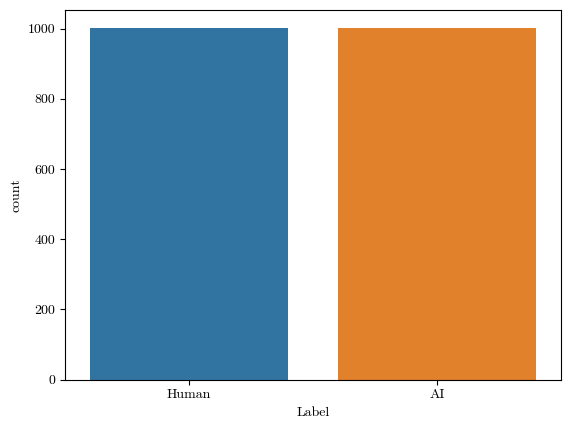

In [ ]:
# %% read csv file data
import matplotlib.pyplot as plt
import seaborn as sns

file = pd.read_excel('Processed.xlsx')
#pd.read_csv(Path().joinpath('data','traindata2.csv'))
print(file['Answers'].head(11))
plt.rcParams['font.sans-serif']= "cmr10"
sns.countplot(x='Label',hue='Label',data=file)
plt.show()

In [ ]:
df = pd.read_excel('Processed.xlsx')

print(df['Answers'])

0                                                 රාවණා 1
1                                          ලෝන්ලි ප්ලැනට්
2                                                  වූහාන්
3                                                   25200
4                          ආසියා රග්බී පළමු කාණ්ඩ ශූරතාවය
                              ...                        
2001    ශ්‍රී ලංකාවේ ප්‍රථම සිංහල දිනපතා පුවත්පත වන්නේ...
2002    ශ්‍රී ලංකාවේ ප්‍රථම ඉරිදා පුවත්පත වන්නේ ස්වදේශ...
2003    ශ්‍රී ලංකාවේ ප්‍රථම චිත්‍ර කතාව ලෙස සැලකෙන්නේ ...
2004    ශ්‍රී ලංකාවේ ප්‍රථම චිත්‍ර කතාව වන "නිලා" නිර්...
2005    ඔව්, ශ්‍රී ලංකාවේ නූතන පන්සල් චිත්‍ර කථාවේ පුර...
Name: Answers, Length: 2006, dtype: object


In [ ]:
stopwords_set = ["සහ","සමග","සමඟ","අහා","ආහ්","ආ","ඕහෝ","අනේ","අඳෝ","අපොයි","පෝ","අයියෝ","ආයි","ඌයි","චී","චිහ්","චික්","හෝ‍","දෝ",
                 "දෝහෝ","මෙන්","සේ","වැනි","බඳු","වන්","අයුරු","අයුරින්","ලෙස","වැඩි","ශ්‍රී","හා","ය","නිසා","නිසාවෙන්","බවට","බව","බවෙන්","නම්","වැඩි","සිට",
                 "දී","මහා","මහ","පමණ","පමණින්","පමන","වන","විට","විටින්","මේ","මෙලෙස","මෙයින්","ඇති","ලෙස","සිදු","වශයෙන්","යන","සඳහා","මගින්","හෝ‍",
                 "ඉතා","ඒ","එම","ද","අතර","විසින්","සමග","පිළිබඳව","පිළිබඳ","තුළ","බව","වැනි","මහ","මෙම","මෙහි","මේ","වෙත","වෙතින්","වෙතට","වෙනුවෙන්",
                 "වෙනුවට","වෙන","ගැන","නෑ","අනුව","නව","පිළිබඳ","විශේෂ","දැනට","එහෙන්","මෙහෙන්","එහේ","මෙහේ","ම","තවත්","තව","සහ","දක්වා","ට","ගේ",
                 "එ","ක","ක්","බවත්","බවද","මත","ඇතුලු","ඇතුළු","මෙසේ","වඩා","වඩාත්ම","නිති","නිතිත්","නිතොර","නිතර","ඉක්බිති","දැන්","යලි","පුන","ඉතින්",
                 "සිට","සිටන්","පටන්","තෙක්","දක්වා","සා","තාක්","තුවක්","පවා","ද","හෝ‍","වත්","විනා","හැර","මිස","මුත්","කිම","කිම්","ඇයි","මන්ද","හෙවත්",
                 "නොහොත්","පතා","පාසා","ගානෙ","තව","ඉතා","බොහෝ","වහා","සෙද","සැනින්","හනික","එම්බා","එම්බල","බොල","නම්","වනාහි","කලී","ඉඳුරා",
                 "අන්න","ඔන්න","මෙන්න","උදෙසා","පිණිස","සඳහා","රබයා","නිසා","එනිසා","එබැවින්","බැවින්","හෙයින්","සේක්","සේක","ගැන","අනුව","පරිදි","විට",
                 "තෙක්","මෙතෙක්","මේතාක්","තුරු","තුරා","තුරාවට","තුලින්","නමුත්","එනමුත්","වස්",'මෙන්',"ලෙස","පරිදි","එහෙත්"]


In [ ]:
print(stopwords_set)

['සහ', 'සමග', 'සමඟ', 'අහා', 'ආහ්', 'ආ', 'ඕහෝ', 'අනේ', 'අඳෝ', 'අපොයි', 'පෝ', 'අයියෝ', 'ආයි', 'ඌයි', 'චී', 'චිහ්', 'චික්', 'හෝ\u200d', 'දෝ', 'දෝහෝ', 'මෙන්', 'සේ', 'වැනි', 'බඳු', 'වන්', 'අයුරු', 'අයුරින්', 'ලෙස', 'වැඩි', 'ශ්\u200dරී', 'හා', 'ය', 'නිසා', 'නිසාවෙන්', 'බවට', 'බව', 'බවෙන්', 'නම්', 'වැඩි', 'සිට', 'දී', 'මහා', 'මහ', 'පමණ', 'පමණින්', 'පමන', 'වන', 'විට', 'විටින්', 'මේ', 'මෙලෙස', 'මෙයින්', 'ඇති', 'ලෙස', 'සිදු', 'වශයෙන්', 'යන', 'සඳහා', 'මගින්', 'හෝ\u200d', 'ඉතා', 'ඒ', 'එම', 'ද', 'අතර', 'විසින්', 'සමග', 'පිළිබඳව', 'පිළිබඳ', 'තුළ', 'බව', 'වැනි', 'මහ', 'මෙම', 'මෙහි', 'මේ', 'වෙත', 'වෙතින්', 'වෙතට', 'වෙනුවෙන්', 'වෙනුවට', 'වෙන', 'ගැන', 'නෑ', 'අනුව', 'නව', 'පිළිබඳ', 'විශේෂ', 'දැනට', 'එහෙන්', 'මෙහෙන්', 'එහේ', 'මෙහේ', 'ම', 'තවත්', 'තව', 'සහ', 'දක්වා', 'ට', 'ගේ', 'එ', 'ක', 'ක්', 'බවත්', 'බවද', 'මත', 'ඇතුලු', 'ඇතුළු', 'මෙසේ', 'වඩා', 'වඩාත්ම', 'නිති', 'නිතිත්', 'නිතොර', 'නිතර', 'ඉක්බිති', 'දැන්', 'යලි', 'පුන', 'ඉතින්', 'සිට', 'සිටන්', 'පටන්', 'තෙක්', 'දක්වා', 'සා', 'තාක්', 'තුවක්', 'පවා', 'ද',

In [ ]:
translate_words_dict = {
    "unp": "එක්සත් ජාතික පක්ෂය",
    "muslim": "මුස්ලිම්",
    "srilankanpolitics": "ශ්‍රී ලංකන් දේශපාලනය",
    "council": "සභාව",
    "sinhala": "සිංහල",
    "buddhist": "බෞද්ධ",
    "buddhism": "බුද්ධාගම",
    "srilanka": "ශ්‍රී ලංකාව",
    "racist": "ජාතිවාදී",
    "presidentialfirst": "පළමු ජනාධිපති",
    "feeling": "හැඟීම",
    "feminist": "ස්ත්‍රීවාදී",
    "loved": "ආදරය කළා",
    "team": "කණ්ඩායම",
    "tclsl":"ට්විටර් ක්‍රිකට් ලීගය ශ්‍රී ලංකාව",
    "pongal": "පොංගල්",
    "pongalfestival": "පොංගල් උත්සවය",
    "women": "කාන්තා",
    "nextpresidentinsl": "ශ්‍රී ලංකාවේ මීළඟ ජනාධිපති ",
    "seventhexecutivepresident": "හත්වන විධායක සභාපති",
    "hate": "වෛරය",
    "love": "ආදරය",
    "angry": "තරහයි",
    "doctor": "ඩොක්ටර්",
    "ltte": "එල්ටීටීඊය",
    "lka": "‍ශ්‍රී ලංකාව",
    "hurt": "රිදෙනවා",
    "typo": "යතුරු ලියනය",
    "racial": "වාර්ගික",
    "hatred": "වෛරය",
    "halal": "හලාල්",
    "wicket": "කඩුල්ල",
    "taker": "ටේකර්",
    "indoor": "ගෘහස්ථ",
    "attacker": "ප්‍රහාරකයා",
    "attack": "ප්රහාරය",
    "spikers": "ස්පිකර්ස්",
    "training": "පුහුණුව",
    "final": "අවසාන",
    "match": "තරගය",
    "tournament": "තරඟාවලිය",
    "youth": "තරුණ",
    "amen": "ආමෙන්",
    "enough": "ඇති",
    "standagainstracism": "ජාතිවාදයට එරෙහිව නැගී සිටින්න"
}

def translate_to_sinhala(word: str) -> str:
  word = word.lower()
  if word in translate_words_dict:
        return translate_words_dict[word]
  return word

In [ ]:
from sinling import SinhalaTokenizer as tokenizer,SinhalaStemmer as stemmer, POSTagger,preprocess, word_joiner,word_splitter
stemmer = stemmer()

def stem_word(word: str) -> str:
    word= translate_to_sinhala(word)
    """
    Stemming words
    :param word: word
    :return: stemmed word
    """
    if len(word) < 4:
        return word

    # remove 'ට'
    if word[-1] == 'ට':
        return word[:-1]

    # remove 'ම'
    if word[-1] == 'ම':
        return word[:-1]

    # remove 'ද'
    if word[-1] == 'ද':
        return word[:-1]

    # remove 'ටත්'
    if word[-3:] == 'ටත්':
        return word[:-3]

    # remove 'එක්'
    if word[-3:] == 'ෙක්':
        return word[:-3]

    # remove 'යේ'
    if word[-2:] == 'යේ':
        return word[:-2]

    # remove 'ගෙ' (instead of ගේ because this step comes after simplifying text)
    if word[-2:] == 'ගෙ':
        return word[:-2]

    # remove 'එ'
    if word[-1:] == 'ෙ':
        return word[:-1]

    # remove 'ක්'
    if word[-2:] == 'ක්':
        return word[:-2]

    # remove 'වත්'
    if word[-3:] == 'වත්':
        return word[:-3]

    word=stemmer.stem(word)
    word=word[0]


    # else
    return word

In [ ]:


def filter_stop_words(sentences):
    filtered_sentences = []
    detokenizer = Detok()
    for sentence in sentences:
        tokenized_sentence = word_tokenize(sentence)
        filtered_sentence = [word for word in tokenized_sentence if word not in stopwords_set]
        filtered_sentence = []
        for w in tokenized_sentence:
            if w not in stopwords_set:
                filtered_sentence.append(stem_word(w))
        filtered_sentences.append(filtered_sentence)
    return filtered_sentences





In [ ]:
def detokenize(filtered_sentences):
    detokenized_sentences = []
    for sentence in filtered_sentences:
        detokenized_sentences.append(TreebankWordDetokenizer().detokenize(sentence))
    return detokenized_sentences

    print(detokenized_sentences)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Answers  2000 non-null   object
 1   Label    2006 non-null   object
dtypes: object(2)
memory usage: 31.5+ KB


In [ ]:
df['Answers'] = df['Answers'].astype(str)

In [ ]:
nltk.download('punkt_tab')
filtered_sentences = filter_stop_words(df['Answers'])
detokenized_sentences = detokenize(filtered_sentences)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
detokenized_sentences

['රාවණ 1',
 'ලෝන්ලි ප්ලැනට',
 'වූහා',
 '25200',
 'ආසි රග්බ පළ කාණ්ඩ ශූරතාව',
 'වලයාකාර',
 'නෝත්ර දා දෙව්මැදුර',
 'ලන්ඩ',
 'චීන',
 'උණ කුල ශාඛ',
 'මැක්සි ගෝර්',
 'ඇෆ්ලටොක්සී',
 'කියුබා',
 'කැරොලොය ජූරි',
 'පිහිනී',
 'ඉන්දියා',
 'ආචාර්\u200d ශිරාණි බණ්ඩාරනා',
 'ජිනී ස්විස්ටර්ලන්ත',
 'මිථාලි රාජ',
 'මධ්යධරණ මුහු රතු මුහු',
 'ෂෙයි හසී',
 'මේස පන්ද',
 'දක ඇමරික අන්දීස',
 'ජනමාධ්\u200d අමාත්යංශ',
 'ජී.බ . සේනන මහත',
 'චීන, තායිවාන සිංගප්පූර',
 'සෝඩිය ක්ලෝරයිඩ',
 'නීල ආර්ථික',
 'ෆැල්ක 9',
 'ශාන් නිකේතන',
 'රැම්සාර',
 'තාඩ',
 'ඩෙන්මාර්ක',
 'රැෆ්ලේශි ආර්නෝල්ඩ',
 'ස්විස්ටර්ලන්ත',
 'වැලන්ටි ටෙරෙෂ්කෝ',
 'මහාචාර් මොහා මුණසිංහ',
 'නේපාල',
 'සමුද්\u200dර පරිසර ආරක්ෂණ අධිකාර',
 'ෂෙන්ෂ 12',
 'මීටර 330',
 'ජෝර්ජ වොෂිංට',
 'සෙන්ට වින්සන්ට දූපත',
 'ගංග්න ස්ටයිල නැටු',
 'ජපාන',
 'ඩන්ක වයිට',
 'ජේ . රොබට ඕපන්හයිමර',
 'ජනමාධ්\u200dයවේද, සාහිත්\u200d කලා සංගීත ක්ෂේත්\u200dරය කුසලත',
 'ඉන්දියා',
 'කොළොම්බි විශ්වවිද්\u200dයාල',
 'චීන',
 'ඇමරිකා',
 '103',
 'පට්ටිපොළ',
 'රතු',
 'ඉත්තෑ මස් රතු මස් ගණය අ මස් වර්ග',

In [ ]:
simplify_characters_dict = {
    # Consonant
    "ඛ": "ක",
    "ඝ": "ග",
    "ඟ": "ග",
    "ඡ": "ච",
    "ඣ": "ජ",
    "ඦ": "ජ",
    "ඤ": "ඥ",
    "ඨ": "ට",
    "ඪ": "ඩ",
    "ණ": "න",
    "ඳ": "ද",
    "ඵ": "ප",
    "භ": "බ",
    "ඹ": "බ",
    "ශ": "ෂ",
    "ළ": "ල",

    # Vowels
    "ආ": "අ",
    "ඈ": "ඇ",
    "ඊ": "ඉ",
    "ඌ": "උ",
    "ඒ": "එ",
    "ඕ": "ඔ",

}

In [ ]:
def get_simplified_character(character: str) -> str:
    if len(character) != 1:
        raise TypeError("character should be a string with length 1")
    try:
        return simplify_characters_dict[character]
    except KeyError:
        return character

In [ ]:
def simplify_sinhalese_text(text: str) -> str:
    """
    simplify
    :param text:
    :return:
    """
    modified_text = ""
    for c in text:
        modified_text += get_simplified_character(c)
    return modified_text

In [ ]:
df['filtered_sentence'] = detokenized_sentences
df['filtered_sentence'] = df['filtered_sentence'].apply(simplify_sinhalese_text).tolist()
#df['filtered_sentence'] = df['Text'].apply(remove_english_words).tolist()

#df.to_csv('SubjectivityTagged.csv')
df.to_excel('stem.xlsx')

# Data Cleaning

In [ ]:
df = pd.read_excel('stem.xlsx')


In [ ]:
df['Text_cleaned'] = df['Answers'].str.replace('**',' ')
df['Text_cleaned'] = df['Text_cleaned'].str.replace('?',' ')

df['Text_cleaned'][1188]

'ස්ථූප ආකෘති හය මෙසේ නම් කළ හැකිය:\n\n1.  ධම්මචෙත්තිය  (Dhammacetiya) - භාෂිත ආකෘතිය\n2.  සුභූමිචෙත්තිය  (Subhūmicetiya) - පුෂ්ප ආකෘතිය\n3.  වජ්\u200dරචෙත්තිය  (Vajiracetiya) - සුල ගොමන ආකෘතිය\n4.  මනිචෙත්තිය  (Manicetiya) - ස්කන්ධක ආකෘතිය\n5.  බුද්ධකෙත්තිය  (Buddhaketiya) - වඩුගෙය ආකෘතිය\n6.  කඨිනචෙත්තිය  (Kaṭhinacetiya) - කොණ්ඩෝටු ආකෘතිය'

In [ ]:
# english-sinhala dictionary
dictionary = {}
df_translate= pd.read_csv('en-sinhala dictionary.csv')
dictionary_file = df_translate["En,sinhala"]

for line in dictionary_file:
    key, value = line.strip().split(",")
    dictionary[key] = value

In [ ]:
# to check whether the string contains English words(any)

def translate_english(x):
    for word in x.split():
        word_cleaned = "".join(char for char in word if char not in string.punctuation)  # Remove punctuation
        if re.match('[a-zA-Z]', word_cleaned):  # Check if the word contains English letters
            word_lower = word_cleaned.lower()  # Convert to lowercase for dictionary lookup
            translated_word = dictionary.get(word_lower, '')  # Translate using the dictionary
            x = x.replace(word, translated_word)
    return x

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2006 non-null   int64 
 1   Answers            2000 non-null   object
 2   Label              2006 non-null   object
 3   filtered_sentence  2000 non-null   object
 4   Text_cleaned       2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.5+ KB


In [ ]:

def clean_data(dataframe):
    # Drop duplicate rows
    dataframe.drop_duplicates(subset='Answers', inplace=True)

    #punctuation removal
    string_text = dataframe['Text_cleaned'].str
    dataframe['Text_cleaned'] = string_text.translate(str.maketrans('', '', string.punctuation))
    print(string_text)

    # coerced entire coloumn to str dtype
    dataframe['Text_cleaned'] = dataframe['Text_cleaned'].astype(str)

    #translate English to sinhala
    df['Text_cleaned'] = df['Text_cleaned'].apply(translate_to_sinhala).tolist()
    df['Text_cleaned'] = df['Text_cleaned'].apply(translate_english).tolist()

    # simplify sinhala characters
    df['Text_cleaned'] = df['Text_cleaned'].apply(simplify_sinhalese_text).tolist()

    # pos tagging
    #df['Text'] = df['Text'].apply(tagger.predict).tolist()

    #print("New shape:", dataframe.shape)
    return dataframe.head()

clean_data(df)
df

,Unnamed: 0,Answers,Label,filtered_sentence,Text_cleaned
0,0,රාවණා 1,Human,රාවන 1,රාවනා 1
1,1,ලෝන්ලි ප්ලැනට්,Human,ලෝන්ලි ප්ලැනට,ලෝන්ලි ප්ලැනට්
2,2,වූහාන්,Human,වූහා,වූහාන්
3,3,25200,Human,25200,25200
4,4,ආසියා රග්බී පළමු කාණ්ඩ ශූරතාවය,Human,අසි රග්බ පල කාන්ඩ ෂූරතාව,අසියා රග්බී පලමු කාන්ඩ ෂූරතාවය
...,...,...,...,...,...
2001,2001,ශ්‍රී ලංකාවේ ප්‍රථම සිංහල දිනපතා පුවත්පත වන්නේ...,AI,ලංක ප්‍රථ සිංහ දිනපත පුවත්පත ව * * දිවයි * * ....,ෂ්‍රී ලංකාවේ ප්‍රථම සිංහල දිනපතා පුවත්පත වන්නේ...
2002,2002,ශ්‍රී ලංකාවේ ප්‍රථම ඉරිදා පුවත්පත වන්නේ ස්වදේශ...,AI,ලංක ප්‍රථ ඉරිද පුවත්පත ව ස්වදේෂ මිතෘ (swadesha...,ෂ්‍රී ලංකාවේ ප්‍රථම ඉරිදා පුවත්පත වන්නේ ස්වදේෂ...
2003,2003,ශ්‍රී ලංකාවේ ප්‍රථම චිත්‍ර කතාව ලෙස සැලකෙන්නේ ...,AI,"ලංක ප්‍රථ චිත්‍ර කතා සැලකෙ * *"" න"" * * . එය 19...",ෂ්‍රී ලංකාවේ ප්‍රථම චිත්‍ර කතාව ලෙස සැලකෙන්නේ ...
2004,2004,"ශ්‍රී ලංකාවේ ප්‍රථම චිත්‍ර කතාව වන ""නිලා"" නිර්...",AI,"ලංක ප්‍රථ චිත්‍ර කතා ""න"" නිර්මාන කලේ ප්‍රවීන ච...",ෂ්‍රී ලංකාවේ ප්‍රථම චිත්‍ර කතාව වන නිලා නිර්මා...


In [ ]:
df.to_excel('clean.xlsx')

In [ ]:
df = df.dropna(how='all')

In [ ]:

df.to_excel('clean.xlsx')

In [ ]:
# Convert 'Labels' column to 0 and 1
df['Label'] = df['Label'].map({'Human': 0, 'AI': 1})

In [ ]:

# Verify the conversion
print(df['Label'].value_counts())
df

Label
1    999
0    992
Name: count, dtype: int64


,Unnamed: 0,Answers,Label,filtered_sentence,Text_cleaned
0,0,රාවණා 1,0,රාවන 1,රාවනා 1
1,1,ලෝන්ලි ප්ලැනට්,0,ලෝන්ලි ප්ලැනට,ලෝන්ලි ප්ලැනට්
2,2,වූහාන්,0,වූහා,වූහාන්
3,3,25200,0,25200,25200
4,4,ආසියා රග්බී පළමු කාණ්ඩ ශූරතාවය,0,අසි රග්බ පල කාන්ඩ ෂූරතාව,අසියා රග්බී පලමු කාන්ඩ ෂූරතාවය
...,...,...,...,...,...
2001,2001,ශ්‍රී ලංකාවේ ප්‍රථම සිංහල දිනපතා පුවත්පත වන්නේ...,1,ලංක ප්‍රථ සිංහ දිනපත පුවත්පත ව * * දිවයි * * ....,ෂ්‍රී ලංකාවේ ප්‍රථම සිංහල දිනපතා පුවත්පත වන්නේ...
2002,2002,ශ්‍රී ලංකාවේ ප්‍රථම ඉරිදා පුවත්පත වන්නේ ස්වදේශ...,1,ලංක ප්‍රථ ඉරිද පුවත්පත ව ස්වදේෂ මිතෘ (swadesha...,ෂ්‍රී ලංකාවේ ප්‍රථම ඉරිදා පුවත්පත වන්නේ ස්වදේෂ...
2003,2003,ශ්‍රී ලංකාවේ ප්‍රථම චිත්‍ර කතාව ලෙස සැලකෙන්නේ ...,1,"ලංක ප්‍රථ චිත්‍ර කතා සැලකෙ * *"" න"" * * . එය 19...",ෂ්‍රී ලංකාවේ ප්‍රථම චිත්‍ර කතාව ලෙස සැලකෙන්නේ ...
2004,2004,"ශ්‍රී ලංකාවේ ප්‍රථම චිත්‍ර කතාව වන ""නිලා"" නිර්...",1,"ලංක ප්‍රථ චිත්‍ර කතා ""න"" නිර්මාන කලේ ප්‍රවීන ච...",ෂ්‍රී ලංකාවේ ප්‍රථම චිත්‍ර කතාව වන නිලා නිර්මා...


In [ ]:
import nltk
nltk.download('punkt')  # Download tokenizer resources
from nltk.tokenize import word_tokenize

# Tokenize the 'Text_cleaned' column and create a new 'Tokenized' column
df['Tokenized'] = df['Text_cleaned'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(df[['Text_cleaned', 'Tokenized']].head())

                     Text_cleaned                             Tokenized
0                         රාවනා 1                            [රාවනා, 1]
1                  ලෝන්ලි ප්ලැනට්                     [ලෝන්ලි, ප්ලැනට්]
2                          වූහාන්                              [වූහාන්]
3                           25200                               [25200]
4  අසියා රග්බී පලමු කාන්ඩ ෂූරතාවය  [අසියා, රග්බී, පලමු, කාන්ඩ, ෂූරතාවය]


In [ ]:
df.to_excel('tokenized_data.xlsx')

#Feature **Extraction** | TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK Sinhala support (if necessary)
nltk.download('punkt')

# Step 1: Tokenize Sinhala text
df['Tokenized'] = df['Text_cleaned'].apply(word_tokenize)

# Step 2: Convert tokens back to sentences for TF-IDF
df['Text_reconstructed'] = df['Tokenized'].apply(lambda tokens: " ".join(tokens))

# Step 3: Initialize TF-IDF Vectorizer (customize stop words for Sinhala if needed)
tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize)

# Step 4: Fit and transform the Sinhala text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Text_reconstructed'])

# Step 5: Convert TF-IDF matrix to a DataFrame
tfidf_features = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)

# Step 6: Combine TF-IDF features with the original dataset
df_with_tfidf = pd.concat([df, tfidf_features], axis=1)

# Save the TF-IDF-enhanced dataset
#output_file = "/mnt/data/tfidf_features_sinhala.xlsx"
#df_with_tfidf.to_excel(output_file, index=False)

#output_file


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
df_with_tfidf.head()

,Unnamed: 0,Answers,Label,filtered_sentence,Text_cleaned,Tokenized,Text_reconstructed,01,02,03,...,天宫,普通话,것은,그는,송,있는,있으며,지ාතික,필ීපීනස්,
0,0.0,රාවණා 1,0.0,රාවන 1,රාවනා 1,"[රාවනා, 1]",රාවනා 1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,ලෝන්ලි ප්ලැනට්,0.0,ලෝන්ලි ප්ලැනට,ලෝන්ලි ප්ලැනට්,"[ලෝන්ලි, ප්ලැනට්]",ලෝන්ලි ප්ලැනට්,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,වූහාන්,0.0,වූහා,වූහාන්,[වූහාන්],වූහාන්,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,25200,0.0,25200,25200,[25200],25200,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,ආසියා රග්බී පළමු කාණ්ඩ ශූරතාවය,0.0,අසි රග්බ පල කාන්ඩ ෂූරතාව,අසියා රග්බී පලමු කාන්ඩ ෂූරතාවය,"[අසියා, රග්බී, පලමු, කාන්ඩ, ෂූරතාවය]",අසියා රග්බී පලමු කාන්ඩ ෂූරතාවය,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Save the TF-IDF-enhanced dataset
output_file = "tfidf_features_sinhala.xlsx"
df_with_tfidf.to_excel(output_file)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split

X = tfidf_matrix  # Features from TF-IDF
y = df['Label']   # Labels: Human (0) or AI (1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ANN **Algorithm**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error
import numpy as np

# Ensure inputs are in array format
if hasattr(X_train, 'toarray'):  # Convert sparse matrix to dense array if needed
    X_train = X_train.toarray()
X_train = np.array(X_train)

if hasattr(X_test, 'toarray'):  # Convert sparse matrix to dense array if needed
    X_test = X_test.toarray()
X_test = np.array(X_test)

# Define the ANN model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Input layer with 128 neurons
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)

# Test the model
y_pred_prob = model.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred_prob.flatten())  # MAE for probabilities
rmse = np.sqrt(np.mean((y_test - y_pred_prob.flatten())**2))  # RMSE for probabilities

print("Accuracy:", accuracy)
print("MAE (Mean Absolute Error):", mae)
print("RMSE (Root Mean Squared Error):", rmse)
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6035 - loss: 0.6906 - val_accuracy: 0.7712 - val_loss: 0.6794
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9240 - loss: 0.6526 - val_accuracy: 0.8182 - val_loss: 0.6349
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9719 - loss: 0.5468 - val_accuracy: 0.8245 - val_loss: 0.5461
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9801 - loss: 0.3618 - val_accuracy: 0.8433 - val_loss: 0.4528
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9917 - loss: 0.1746 - val_accuracy: 0.8245 - val_loss: 0.4026
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9986 - loss: 0.0700 - val_accuracy: 0.8119 - val_loss: 0.3947
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9998 - loss: 0.0314 - val_accuracy: 0.8119 - val_loss: 0.4036
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9998 - loss: 0.0170 - val_accuracy: 0.8025 - v

# ANN | Cross Validation

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd

# Ensure inputs are in array format and reset indices if using pandas
if hasattr(X, 'reset_index'):
    X = X.reset_index(drop=True)  # Reset index for X if it's a pandas DataFrame
if hasattr(y, 'reset_index'):
    y = y.reset_index(drop=True)  # Reset index for y if it's a pandas Series

# Convert to numpy arrays if not already
if not isinstance(X, np.ndarray):
    if hasattr(X, "toarray"):
        X = X.toarray()  # Convert sparse matrix to dense array
    else:
        X = np.array(X)

if not isinstance(y, np.ndarray):
    y = np.array(y)

# Define a function to create the ANN model
def create_ann_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),  # Input layer with 128 neurons
        Dropout(0.2),  # Dropout for regularization
        Dense(64, activation='relu'),  # Hidden layer with 64 neurons
        Dropout(0.2),  # Dropout for regularization
        Dense(1, activation='sigmoid')  # Output layer (binary classification)
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation setup
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
fold_accuracies = []
confusion_matrices = []

for train_index, test_index in kfold.split(X, y):
    # Split data into training and validation sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create a new ANN model for each fold
    model = create_ann_model(input_dim=X_train.shape[1])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=0)

    # Test the model
    y_pred_prob = model.predict(X_test)  # Predicted probabilities
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

# Print cross-validation results
print("\nCross-Validation Results:")
for i, (accuracy, conf_matrix) in enumerate(zip(fold_accuracies, confusion_matrices), start=1):
    tn, fp, fn, tp = conf_matrix.ravel()
    print(f"Fold {i}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Confusion Matrix (TN FP FN TP): TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

# Average accuracy across all folds
avg_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy: {avg_accuracy:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Cross-Validation Results:
Fold 1:
  Accuracy: 0.8800
  Confusion Matrix (TN FP FN TP): TN: 90, FP: 10, FN: 14, TP: 86
Fold 2:
  Accuracy: 0.8342
  Confusion Matrix (TN FP FN TP): TN: 80, FP: 20, FN: 13, TP: 86
Fold 3:
  Accuracy: 0.8392
  Confusion Matrix (TN FP FN TP): TN: 83, FP: 16, FN: 16, TP: 84
Fold 4:
  Accuracy: 0.8744
  Confusion Matrix (TN FP FN TP): TN: 87, FP: 12, FN: 13, TP: 87
Fold 5:
  Accuracy: 0.8442
  Confusion Matrix (TN FP FN TP): TN: 84, FP: 15, FN: 16, TP: 84
Fold 6:
  Accuracy: 0.8191
  Confusion Matrix (TN FP FN TP): TN: 81, FP: 18, FN: 18, TP: 82
Fold 7:
  Accuracy: 0.8744
  Confusion Matrix (TN FP FN TP): TN: 90, FP: 9, FN: 16, TP: 84
Fold 8:
  Accuracy: 0.8543
  Confusion Matrix (TN FP FN TP): TN: 86, FP: 13, FN: 16, TP: 84
Fold 9:
  Accuracy: 0.8442
  Confusion Matrix (TN FP FN TP): TN: 84, FP: 15, FN: 16, TP: 84
Fold 10:
  Accuracy: 0.7990
  Confusion Matrix (TN FP FN TP): TN: 76, FP: 23, FN: 17, TP: 83

Average Accura

# ANN Confusion matrix

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, confusion_matrix
import numpy as np
import pandas as pd

# Ensure inputs are in array format
if hasattr(X_train, 'toarray'):  # Convert sparse matrix to dense array if needed
    X_train = X_train.toarray()
X_train = np.array(X_train)

if hasattr(X_test, 'toarray'):  # Convert sparse matrix to dense array if needed
    X_test = X_test.toarray()
X_test = np.array(X_test)

# Define the ANN model
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Input layer with 128 neurons
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)

# Test the model
y_pred_prob = model.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred_prob.flatten())  # MAE for probabilities
rmse = np.sqrt(np.mean((y_test - y_pred_prob.flatten())**2))  # RMSE for probabilities

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Print results
print("Accuracy:", accuracy)
print("MAE (Mean Absolute Error):", mae)
print("RMSE (Root Mean Squared Error):", rmse)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Output confusion matrix in TN FP FN TP format
print("\nConfusion Matrix (TN FP FN TP):")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6099 - loss: 0.6878 - val_accuracy: 0.0000e+00 - val_loss: 0.7809
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6048 - loss: 0.6459 - val_accuracy: 0.0000e+00 - val_loss: 0.9116
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7365 - loss: 0.5309 - val_accuracy: 0.1448 - val_loss: 0.9526
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9316 - loss: 0.3436 - val_accuracy: 0.3538 - val_loss: 0.9526
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9790 - loss: 0.1591 - val_accuracy: 0.4819 - val_loss: 0.9399
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9965 - loss: 0.0571 - val_accuracy: 0.5070 - val_loss: 1.0151
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9995 - loss: 0.0262 - val_accuracy: 0.5348 - val_loss: 1.0498
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 1.0000 - loss: 0.0152 - val_accuracy: 0.

# LSTM Confusion Matrix

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, confusion_matrix
import numpy as np

# Ensure inputs are in array format and convert sparse matrices to dense arrays if necessary
if hasattr(X_train, 'toarray'):  # Convert sparse matrix to dense array if needed
    X_train = X_train.toarray()
X_train = np.array(X_train)

if hasattr(X_test, 'toarray'):  # Convert sparse matrix to dense array if needed
    X_test = X_test.toarray()
X_test = np.array(X_test)

# Check original shapes before reshaping
print("Original X_train shape:", X_train.shape)
print("Original X_test shape:", X_test.shape)

# Reshape data to 3D [samples, timesteps, features]
timesteps = 1  # Number of timesteps (set to 1 if not sequential)
n_features = X_train.shape[1]  # Number of features in each sample
X_train = X_train.reshape((X_train.shape[0], timesteps, n_features))
X_test = X_test.reshape((X_test.shape[0], timesteps, n_features))

# Define the LSTM model
model = Sequential([
    LSTM(128, activation='tanh', return_sequences=False, input_shape=(timesteps, n_features)),  # LSTM layer
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Dense layer for further processing
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)

# Test the model
y_pred_prob = model.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred_prob.flatten())  # MAE for probabilities
rmse = np.sqrt(np.mean((y_test - y_pred_prob.flatten())**2))  # RMSE for probabilities

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Print results
print("Accuracy:", accuracy)
print("MAE (Mean Absolute Error):", mae)
print("RMSE (Root Mean Squared Error):", rmse)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Output confusion matrix in TN FP FN TP format
print("\nConfusion Matrix (TN FP FN TP):")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")


Original X_train shape: (1792, 10326)
Original X_test shape: (199, 10326)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.5627 - loss: 0.6901 - val_accuracy: 0.0000e+00 - val_loss: 0.7401
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.6110 - loss: 0.6632 - val_accuracy: 0.0000e+00 - val_loss: 0.7889
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.8038 - loss: 0.5978 - val_accuracy: 0.1421 - val_loss: 0.8123
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.9184 - loss: 0.4690 - val_accuracy: 0.3148 - val_loss: 0.8224
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.9696 - loss: 0.3015 - val_accuracy: 0.4234 - val_loss: 0.8309
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.9852 - loss: 0.1601 - val_accuracy: 0.4986 - val_loss: 0.8616
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.9952 - loss: 0.0802 - val_accuracy: 0.5097 - val_loss: 0.9285
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.9985 - loss: 0.0414 - val_accu

# LSTM | Cross Validation

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Ensure inputs are numpy arrays and 2D
if hasattr(X, 'reset_index'):
    X = X.reset_index(drop=True)
if hasattr(y, 'reset_index'):
    y = y.reset_index(drop=True)

X = np.array(X) if not isinstance(X, np.ndarray) else X
y = np.array(y) if not isinstance(y, np.ndarray) else y

# Ensure X has at least 2 dimensions
if X.ndim == 1:
    X = X.reshape(-1, 1)

# Check the data dimensions and class distribution
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Unique classes in y:", np.unique(y))

if X.shape[0] != len(y):
    raise ValueError(f"Mismatch in sample sizes: X has {X.shape[0]} samples, y has {len(y)} samples")

if len(np.unique(y)) < 2:
    raise ValueError(f"y must have at least 2 classes, but found: {np.unique(y)}")

# Reshape data to 3D [samples, timesteps, features]
timesteps = 1  # Number of timesteps
n_samples, n_features = X.shape
X = X.reshape((n_samples, timesteps, n_features))

# Define a function to create the LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(128, activation='tanh', return_sequences=False, input_shape=input_shape),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
confusion_matrices = []

for train_index, test_index in kfold.split(X, y):
    # Split data into training and testing sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train the LSTM model
    model = create_lstm_model(input_shape=(timesteps, n_features))
    model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=0)

    # Predict and evaluate
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(conf_matrix)

# Print cross-validation results
print("\nCross-Validation Results:")
for i, (accuracy, conf_matrix) in enumerate(zip(fold_accuracies, confusion_matrices), start=1):
    tn, fp, fn, tp = conf_matrix.ravel()
    print(f"Fold {i}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Confusion Matrix (TN FP FN TP): TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

# Average accuracy across all folds
avg_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Accuracy: {avg_accuracy:.4f}")


X shape: (1991, 10326)
y shape: (1991,)
Unique classes in y: [0 1]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Cross-Validation Results:
Fold 1:
  Accuracy: 0.8546
  Confusion Matrix (TN FP FN TP): TN: 167, FP: 32, FN: 26, TP: 174
Fold 2:
  Accuracy: 0.8467
  Confusion Matrix (TN FP FN TP): TN: 170, FP: 29, FN: 32, TP: 167
Fold 3:
  Accuracy: 0.8492
  Confusion Matrix (TN FP FN TP): TN: 168, FP: 30, FN: 30, TP: 170
Fold 4:
  Accuracy: 0.8518
  Confusion Matrix (TN FP FN TP): TN: 171, FP: 27, FN: 32, TP: 168
Fold 5:
  Accuracy: 0.8266
  Confusion Matrix (TN FP FN TP): TN: 161, FP: 37, FN: 32, TP: 168

Average Accuracy: 0.8458


# LSTM Algorithm

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error
import numpy as np

# Ensure inputs are in array format and convert sparse matrices to dense arrays if necessary
if hasattr(X_train, 'toarray'):  # Convert sparse matrix to dense array if needed
    X_train = X_train.toarray()
X_train = np.array(X_train)

if hasattr(X_test, 'toarray'):  # Convert sparse matrix to dense array if needed
    X_test = X_test.toarray()
X_test = np.array(X_test)

# Check original shapes before reshaping
print("Original X_train shape:", X_train.shape)
print("Original X_test shape:", X_test.shape)

# Assuming X_train has shape (15920, n_features) and you want to reshape for LSTM
# The reshape needs to be 3D: [samples, timesteps, features]
# If there are no natural timesteps (like in time series), you can set timesteps=1
timesteps = 1  # Number of timesteps (set to 1 if not sequential)
n_features = X_train.shape[1]  # Number of features in each sample

# Reshape data to 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], timesteps, n_features))
X_test = X_test.reshape((X_test.shape[0], timesteps, n_features))

# Define the LSTM model
model = Sequential([
    LSTM(128, activation='tanh', return_sequences=False, input_shape=(timesteps, n_features)),  # LSTM layer
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Dense layer for further processing
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)

# Test the model
y_pred_prob = model.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred_prob.flatten())  # MAE for probabilities
rmse = np.sqrt(np.mean((y_test - y_pred_prob.flatten())**2))  # RMSE for probabilities

print("Accuracy:", accuracy)
print("MAE (Mean Absolute Error):", mae)
print("RMSE (Root Mean Squared Error):", rmse)
print("Classification Report:\n", classification_report(y_test, y_pred))



Original X_train shape: (1593, 1, 10326)
Original X_test shape: (398, 1, 10326)


ValueError: cannot reshape array of size 16449318 into shape (1593,1,1)

# SVM Algorithm | Confusion Matrix

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, confusion_matrix
import numpy as np
import pandas as pd

# Ensure inputs are in array format
if hasattr(X_train, 'toarray'):  # Convert sparse matrix to dense array if needed
    X_train = X_train.toarray()
X_train = np.array(X_train)

if hasattr(X_test, 'toarray'):  # Convert sparse matrix to dense array if needed
    X_test = X_test.toarray()
X_test = np.array(X_test)

# Define the SVM model
model = SVC(kernel='linear', probability=True)  # You can change the kernel to 'rbf', 'poly', etc.

# Train the model
model.fit(X_train, y_train)

# Test the model
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
y_pred = model.predict(X_test)  # Predicted class labels

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred_prob)  # MAE for probabilities
rmse = np.sqrt(np.mean((y_test - y_pred_prob)**2))  # RMSE for probabilities

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Print results
print("Accuracy:", accuracy)
print("MAE (Mean Absolute Error):", mae)
print("RMSE (Root Mean Squared Error):", rmse)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Output confusion matrix in TN FP FN TP format
print("\nConfusion Matrix (TN FP FN TP):")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

Accuracy: 0.8696741854636592
MAE (Mean Absolute Error): 0.19912483339954276
RMSE (Root Mean Squared Error): 0.30899652045386233
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       194
           1       0.88      0.87      0.87       205

    accuracy                           0.87       399
   macro avg       0.87      0.87      0.87       399
weighted avg       0.87      0.87      0.87       399


Confusion Matrix (TN FP FN TP):
TN: 169, FP: 25, FN: 27, TP: 178


# SVM | Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, confusion_matrix
import numpy as np

# Ensure inputs are in array format
if hasattr(X_train, 'toarray'):  # Convert sparse matrix to dense array if needed
    X_train = X_train.toarray()
X_train = np.array(X_train)

if hasattr(X_test, 'toarray'):  # Convert sparse matrix to dense array if needed
    X_test = X_test.toarray()
X_test = np.array(X_test)

# Define the SVM model
model = SVC(kernel='linear', probability=True)  # You can change the kernel to 'rbf', 'poly', etc.

# Define the number of folds for cross-validation
k_folds = 5  # You can change this to any number of folds (e.g., 5, 10)
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Accuracy (Mean ± Std Dev): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Train the model on the full training set
model.fit(X_train, y_train)

# Test the model on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
y_pred = model.predict(X_test)  # Predicted class labels

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred_prob)  # MAE for probabilities
rmse = np.sqrt(np.mean((y_test - y_pred_prob)**2))  # RMSE for probabilities

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Print results
print("\nTest Set Evaluation:")
print("Accuracy:", accuracy)
print("MAE (Mean Absolute Error):", mae)
print("RMSE (Root Mean Squared Error):", rmse)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Output confusion matrix in TN FP FN TP format
print("\nConfusion Matrix (TN FP FN TP):")
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

Cross-Validation Accuracy (Mean ± Std Dev): 0.8291 ± 0.0181

Test Set Evaluation:
Accuracy: 0.8696741854636592
MAE (Mean Absolute Error): 0.20079672877191956
RMSE (Root Mean Squared Error): 0.30933164244464606
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       194
           1       0.88      0.87      0.87       205

    accuracy                           0.87       399
   macro avg       0.87      0.87      0.87       399
weighted avg       0.87      0.87      0.87       399


Confusion Matrix (TN FP FN TP):
TN: 169, FP: 25, FN: 27, TP: 178


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split

# Assuming tfidf_matrix and df are already available
X = tfidf_matrix  # Features from TF-IDF
y = df['Label']   # Labels: Human (0) or AI (1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if X_train and X_test are sparse matrices (in case of TF-IDF)
if hasattr(X_train, 'toarray'):  # Check if it's a sparse matrix
    X_train = X_train.toarray()  # Convert to dense array
    X_test = X_test.toarray()    # Convert to dense array

# Now let's check if the conversion worked and ensure they are 2D arrays
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# Ensure the data is 2D (samples, features)
if len(X_train.shape) == 2:  # If X_train is 2D
    samples_train = X_train.shape[0]  # Number of samples
    features_train = X_train.shape[1]  # Number of features

    samples_test = X_test.shape[0]  # Number of samples in test set
    features_test = X_test.shape[1]  # Number of features in test set

    # Reshape for LSTM (samples, time_steps=1, features)
    X_train = X_train.reshape((samples_train, 1, features_train))
    X_test = X_test.reshape((samples_test, 1, features_test))
else:
    raise ValueError("X_train and X_test must be 2D arrays!")

# ------------ LSTM Model ------------

# Define the LSTM model
lstm_model = Sequential([
    LSTM(128, activation='tanh', input_shape=(1, features_train), return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=50, validation_split=0.2)

# Test the LSTM model
y_pred_prob_lstm = lstm_model.predict(X_test)
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int).flatten()

# LSTM model metrics
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_prob_lstm.flatten())
rmse_lstm = np.sqrt(mse_lstm)

# ------------ ANN Model ------------

# Define the ANN model (Feedforward neural network)
ann_model = Sequential([
    Dense(128, input_dim=features_train, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model
ann_model.fit(X_train.reshape(X_train.shape[0], -1), y_train, epochs=20, batch_size=50, validation_split=0.2)

# Test the ANN model
y_pred_ann = ann_model.predict(X_test.reshape(X_test.shape[0], -1))

# ANN model metrics
y_pred_ann_bin = (y_pred_ann > 0.5).astype(int)  # Binarize the predictions
accuracy_ann = accuracy_score(y_test, y_pred_ann_bin)
mse_ann = mean_squared_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)

# ------------ Plotting Comparison ------------

# Prepare data for plotting
metrics = ['Accuracy', 'MSE', 'RMSE']
ann_scores = [accuracy_ann, mse_ann, rmse_ann]
lstm_scores = [accuracy_lstm, mse_lstm, rmse_lstm]

# Plotting
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for ANN and LSTM
bars1 = ax.bar(x - width/2, ann_scores, width, label='ANN', color='skyblue')
bars2 = ax.bar(x + width/2, lstm_scores, width, label='LSTM', color='lightgreen')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of ANN and LSTM Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
files.download('/content/comparison_plot.png')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for the bar graph
metrics = ['MSE', 'RMSE']
ann_scores = [0.12, 0.35]  # Example scores for ANN
lstm_scores = [0.10, 0.32]  # Example scores for LSTM

# Create the bar graph
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for ANN and LSTM
bars1 = ax.bar(x - width/2, ann_scores, width, label='ANN', color='skyblue')
bars2 = ax.bar(x + width/2, lstm_scores, width, label='LSTM', color='lightgreen')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of ANN and LSTM Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Show the plot (ensure it renders before saving)
plt.show()

# Save the plot as an image file
plt.savefig('/content/comparison_plot.png')

# Download the plot image
from google.colab import files
files.download('/content/comparison_plot.png')



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define metrics and their values for both models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
ann_scores = [0.85, 0.88, 0.86, 0.87]  # Example scores for ANN
lstm_scores = [0.88, 0.90, 0.89, 0.91]  # Example scores for LSTM

# Create the bar plot
x = np.arange(len(metrics))  # The label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for ANN and LSTM
bars1 = ax.bar(x - width/2, ann_scores, width, label='ANN', color='skyblue')
bars2 = ax.bar(x + width/2, lstm_scores, width, label='LSTM', color='lightgreen')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of ANN and LSTM Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=10)
ax.legend()

# Annotate bars with their values
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset for the annotation
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Offset for the annotation
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Display the plot
plt.show()

# Save the plot as an image file
plt.savefig('/content/metrics_comparison_plot.png')

# Download the plot image
from google.colab import files
files.download('/content/metrics_comparison_plot.png')


Change colors

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define metrics and their values for both models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
ann_scores = [0.85, 0.88, 0.86, 0.87]  # Example scores for ANN
lstm_scores = [0.88, 0.90, 0.89, 0.91]  # Example scores for LSTM

# Define distinct colors for both models
colors_ann = ['#b8b8b8', '#b8b8b8', '#b8b8b8', '#b8b8b8']  # Muted tones for ANN
colors_lstm = ['#1a80bb', '#1a80bb', '#1a80bb', '#1a80bb']  # Muted tones for LSTM

# Create the bar plot
x = np.arange(len(metrics))  # The label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars for ANN and LSTM with distinct colors
bars1 = [ax.bar(x[i] - width/2, ann_scores[i], width, label='ANN' if i == 0 else "", color=colors_ann[i]) for i in range(len(metrics))]
bars2 = [ax.bar(x[i] + width/2, lstm_scores[i], width, label='LSTM' if i == 0 else "", color=colors_lstm[i]) for i in range(len(metrics))]

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of ANN and LSTM Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=10)
ax.legend()

# Annotate bars with their values
for i in range(len(metrics)):
    height1 = ann_scores[i]
    height2 = lstm_scores[i]
    ax.annotate(f'{height1:.2f}',
                xy=(x[i] - width/2, height1),
                xytext=(0, 3),  # Offset for the annotation
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)
    ax.annotate(f'{height2:.2f}',
                xy=(x[i] + width/2, height2),
                xytext=(0, 3),  # Offset for the annotation
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

# Display the plot
plt.show()

# Save the plot as an image file
plt.savefig('/content/metrics_comparison_plot_distinct_colors.png')

# Download the plot image
from google.colab import files
files.download('/content/metrics_comparison_plot_distinct_colors.png')

